<a href="https://colab.research.google.com/github/hiidenpelto/data_science/blob/master/Analisando_os_dados_do_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Rio de Janeiro

As empresas responsáveis por aplicativos que possibilitam a conexão direta entre o consumidor e o fornecedor de algum tipo de produto/serviço viraram verdadeiras gigantes no mercado, superando em largos passos os seus concorrentes.

Exemplo disso é a [Uber](https://www.uber.com/br/pt-br/), que não possui qualquer carro e transformou-se na maior empresa de transporte do mundo.

O mesmo caminho trilhou o [Airbnb](https://www.airbnb.com.br/) ao possibilitar e intermediar de forma facilitada e prática a relação entre o locador e o locatário. Assim, **tornou-se a maior empresa hoteleira do mundo inteiro** com uma pequena ressalva: **não é proprietária de qualquer hotel**.

Percorrendo o aplicativo, o usuário encontra em poucos minutos centenas de opções de casas, apartamentos e até mesmo quartos para alugar na cidade de sua escolha; na maioria das vezes de forma mais barata ao se comparar com os hotéis da mesma região.

Não é um acaso, portanto, ter a Startup **hospedado mais de 300 milhões de pessoas** ao longo de sua curta existência, se tornando uma gigante do setor.

Uma iniciativa louvável do Airbnb é tornar público os dados do aplicativo de algumas das principais cidades do globo. Através do portal [Inside Airbnb]((http://insideairbnb.com/get-the-data.html), o *download* de uma quantidade massiva de dados torna-se possível, permitindo a análise e desenvolvimento de projetos pelos cientistas de dados.

**Dessa forma, será possível neste notebook analisar os dados da cidade do Rio de Janeiro e extrair informações a partir dos dados brutos;**



##Obtenção dos Dados

Conforme exposto acima, todos os dados brutos foram extraídos do [Inside Airbnb]((http://insideairbnb.com/get-the-data.html).

Para isso, foi baixado apenas este arquivo:


*  `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro* (good for visualisations).

Esses dados foram tornados públicos pelo Airbnb. Conforme consta no próprio site da companhia, eles foram agregados para facilitar o debate público em torno das diversas questões surgidas com o **mercado de aluguel de imóveis residenciais**.



In [0]:
# importar os pacotes Python necessários à análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv")

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


##Análise dos Dados

Obtidos os dados e devidamente importados, será realizado neste momento a análise de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
*  `name`- nome da propriedade anunciada
* `host_id`- número de id do proprietário do imóvel
* `host_name`- nome do proprietário
* `neighbourhood_group`- coluna sem valor válido
* `neighbourhood` - bairro de localização do imóvel
* `latitude` - coordenada da latitude do imóvel
* `longitude` - coordenada da longitude do imóvel
* `roomtipe` - tipo de quarto oferecido
*  `price` - valor do aluguel
* `minimun_nights` - quantidades mínimas de noites para reservar
* `number_of_reviews` - quantidade de avaliações do imóvel
* `last_review` - data da última avaliação
* `reviews_per_mounth`- média da quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo proprietário
* `availability_365` - número de dias de disponibilidade do imóvel ao longo de 365 dias

Vamos iniciar observando como está nosso *dataset*, analisando as 5 primeiras entradas nele contidas.

In [8]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


###**Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos de variáveis?**

Inicialmente, iremos identficar quantos e quais são os tipos das colunas do nosso *dataset*, bem como a quantidade de entradas existentes nele.

In [10]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))
print()
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 35870
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###**Q2. Qual a porcentagem de valores ausentes no dataset?**

A quantidade de valores ausentes em um *dataset* é um dos definidores de sua qualidade. Dessa forma, torna-se premente verificar a relevância dos valores nulos em relação à quantidade total de entradas.

* Percebe-se que a coluna `neighbourhood_group` está com 100% dos seus valores ausentes;
* `last_review` e `reviews_per_month` possuem aproximadamente 40% das suas entradas nulas;
* `name`e `host_name` possuem uma quantidade de entradas nulas insignificante.

In [13]:
# ordenar em ordem descrescente as variáveis de acordo com a porcentagem das suas entradas ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

###**Q3. Qual o tipo de distribuição das variáveis?**

Vamos agora identificar a distribuição das variáveis plotando o histograma.

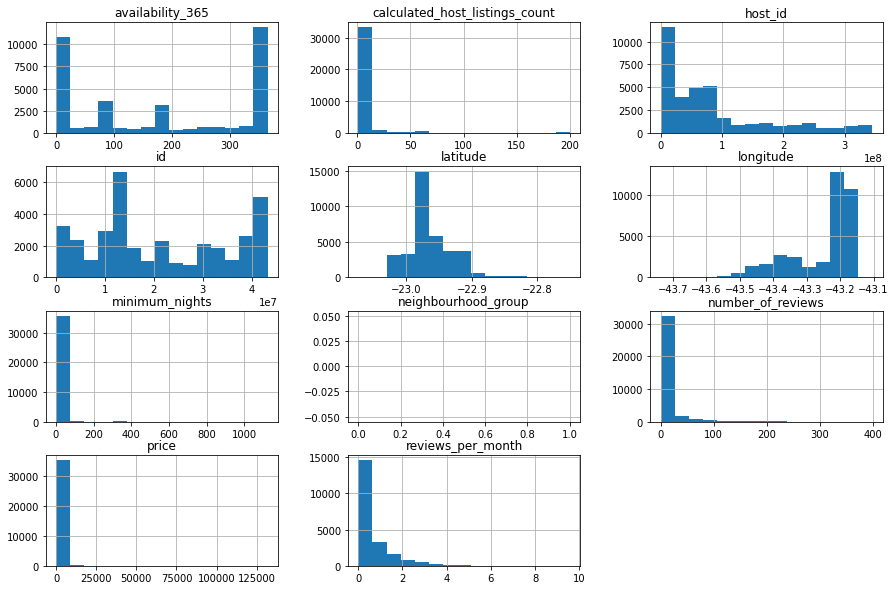

In [17]:
# plotar o histograma das variáveis númericas
df.hist(bins=15, figsize=(15,10));

####Há outliers presentes?

De uma rápida análise dos histogramas acima percebe-se que em diversas variáveis possuem outliers, o que torna o gráfico muito distorcido e dificultam qualquer tipo de análise.

Detectarem a existência de outliers da seguinte forma:

* Resumo estatístico por meio do método `describe()`;
* plotar `bloxplots` para a variável.

Como as entradas inseridas nas variáveis `id`, `host_id`, `latitude`, `longitude` e `neighbourhood_group` não possuem relevância para uma análise estatística, removerei-as do resumo estatístico.

In [19]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,21104.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,0.652248,6.613995,180.371815
std,2229.366334,22.471085,25.827647,0.823388,22.769663,152.510778
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,0.340000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,0.830000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,9.570000,200.000000,365.000000


Percebemos a existência de diversos outliers, os quais devem ser eliminados caso busquemos uma análise estatística confiável.

* Na coluna `price` temos um valor máximo de  131.727 do valor da diária, contrastando em muito com 75% dos alugueis, que se dão na quantia de 632,00 pra baixo.
* Na coluna `minimun_nights` observamos que o valor máximo é o de 1.123 mínimo de noites para o imóvel ser alugado, contrastando de forma demasiada com 75% dos imóveis que possuem o mínimo de noites para aluguel de 4 para baixo.
* Exatamente a mesma coisa se observa na coluna `calculated_host_listings_count`.

####Boxplot para price



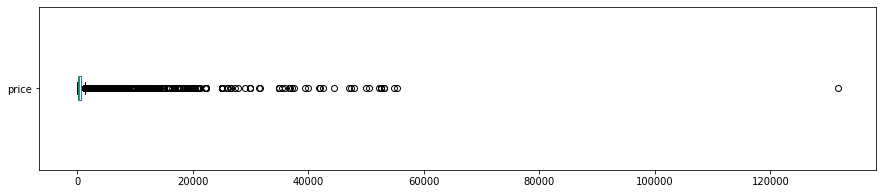


price: valores acima de 1500
3360 entradas
9.3672%


In [27]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

####Bloxpot para minimum_nights

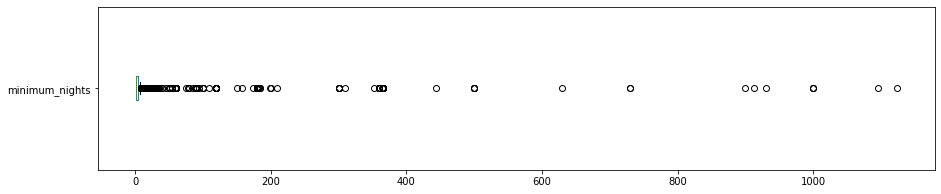


minimum_nights: valores acima de 30:
224 entradas
0.6245%


In [31]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("\nminimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) /  df.shape[0])*100))

####Bloxpot para calculated_host_listings_count

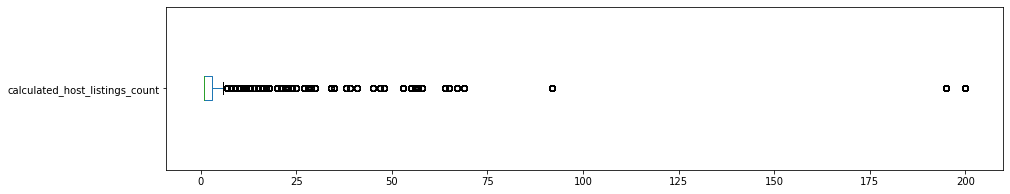


calculated_host_listings_count: valores acima de 10:
3349 entradas
9.3365%


In [34]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 10 imóveis para calculated_host_listings_count
print("\ncalculated_host_listings_count: valores acima de 10:")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 10])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 10]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Vamos agora limpar os outliers das colunas `price`, `minimun_nights` e `calculated_host_listings_count`. Após isso, iremos plotar novamente o histograma.

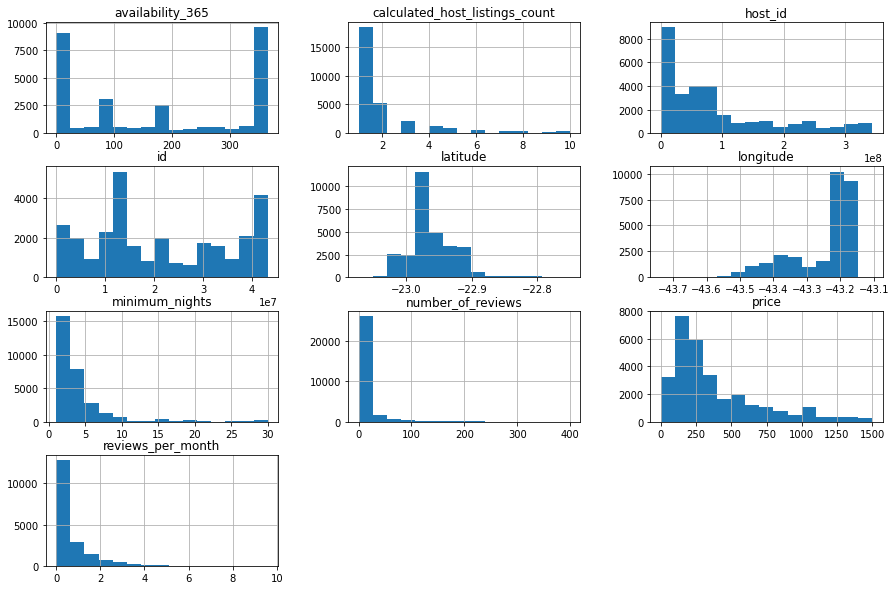

In [38]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 10].index, axis=0, inplace=True)

# remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar o histograma pra as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

###**Q5. Qual a correlação existente entre as variáveis?**

Veremos agora a relação entre as diversas variáveis existentes em nosso *dataset*. Faremos isso da seguinte forma:

* Criação de uma matriz de correlação;
* Geração de um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.



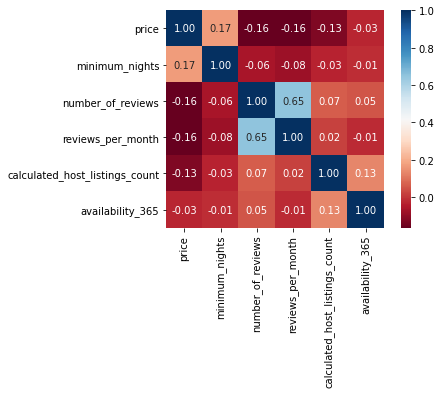

In [42]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Conforme o *heatmap* acima, não se observa uma correlação muito relevante entre as variáveis. Os dados de maior correlação são das variáveis `reviews_per_month` e `number_of_reviews`, trazendo apenas o indicador de que quanto mais a propriedade possui avaliações por mês maior a probabilidade dela possuir um elevado número de avaliações.

###**Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

Realizaremos agora a análise de qual tipo de espaço é o mais disponibilizado pelos proprietários que ofertam seus imóveis para serem alugados na cidade do Rio de Janeiro.

No Airbnb há a possibilidade de se alugar uma casa/apartamento inteiro, apenas um quarto, dividir o quarto com outras pessoas ou até mesmo alugar um quarto de hotel.


In [43]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    20050
Private room        8678
Shared room          687
Hotel room           104
Name: room_type, dtype: int64

In [46]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.679224
Private room       0.293980
Shared room        0.023273
Hotel room         0.003523
Name: room_type, dtype: float64

Vemos que **mais de 67%** dos imóveis disponibilizados no Airbnb na cidade do Rio de Janeiro são para serem **alugados inteiros**.

###**Q7. Qual a localidade mais cara para se alugar um imóvel no Rio de Janeiro através do Airbnb**

Um dos pontos de maior preocupação das pessoas que buscam alugar um imóvel para passar alguns dias em uma cidade certamente é a sua localização.

Ocorre que os imóveis mais bem localizados possuem um preço geralmente mais elevado.

Dessa forma, iremos avaliar qual é a localidade do Rio de Janeiro mais cara para se alugar um imóvel.

**Inicialmente, compararemos os bairros a partir do seu preço médio de locação.**

In [47]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  875.666667
Engenheiro Leal           800.000000
Ricardo de Albuquerque    601.200000
Paciência                 523.555556
Lagoa                     512.925000
Abolição                  483.666667
Leblon                    481.917891
Anchieta                  475.600000
Vargem Grande             475.071429
Barra da Tijuca           474.645458
Name: price, dtype: float64

Em uma análise menos atenciosa, poderíamos achar que bairros como **Vaz Lobo** e **Engenheiro Leal** são os mais caros para se alugar um imóvel; dessa forma, poderiam ser considerados os mais nobres e bem localizados da cidade.

Ocorre que o Rio de Janeiro é uma cidade famosa, estando os seus bairros mais nobres estampados diuturnamente nos noticiários. Uma pessoa que não é do Rio de Janeiro jamais ouviu falar de **Vaz Lobo** e **Engenheiro Leal**, mas certamente já ouviu falar de **Copacabana** e **Ipanema**.

**Vamos ver quantos imóveis estão cadastrados como localizados no bairro Vaz Lobo e Engenheiro Leal.**

In [49]:
# ver quantidade de imóveis no bairro Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

(3, 15)


In [50]:
# ver as 3 entradas do Vaz Lobo
df_clean[df_clean.neighbourhood == "Vaz Lobo"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2908,2768499,Próximo ao Maracanã,14157867,Fernando,Vaz Lobo,-22.85955,-43.32918,Private room,1000,1,0,NaN,NaN,1,0
15776,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85583,-43.32441,Entire home/apt,1329,15,0,NaN,NaN,1,365
33803,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86070,-43.32446,Private room,298,1,0,NaN,NaN,1,362


In [51]:
# ver a quantidade de  imóveis no bairro Engenheiro Leal
print(df_clean[df_clean.neighbourhood == "Engenheiro Leal"].shape)

(2, 15)


In [52]:
# ver as 2 entradas de Engenheiro Leal
df_clean[df_clean.neighbourhood == "Engenheiro Leal"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22589,26996243,Engenheiro Leal Casa,159787826,Antonio,Engenheiro Leal,-22.87497,-43.32121,Entire home/apt,1499,15,0,NaN,NaN,2,365
34840,42403931,Quarto em Cascadura,336310280,Rodrigo,Engenheiro Leal,-22.87728,-43.32327,Private room,101,1,0,NaN,NaN,1,90


É facilmente perceptível que o fato de os bairros possuírem poucas entradas com uma diferença de preço signficativa entre elas está elevando a média de preço dos imóveis neles localizados.

Através da latitude-longitude presentes no *dataset* é possível plotar um mapa dos imóveis destacados pelo preço.


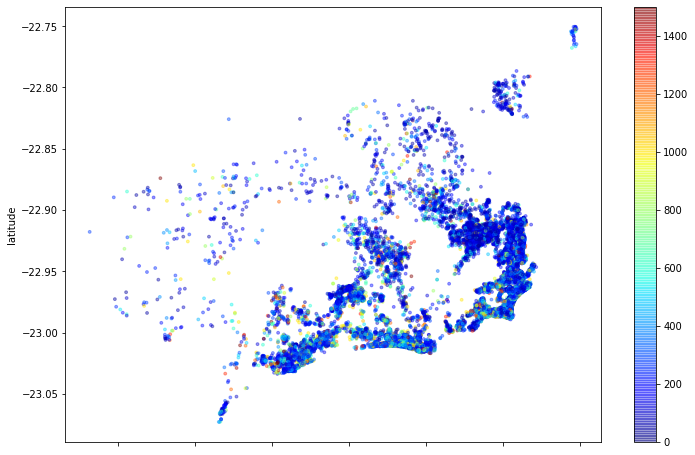

In [53]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

##**Conclusões**

Essa foi uma análise superficial do *dataset* disponibilizado pelo Airbnb referente a cidade do Rio de Janeiro.

Foi possível realizar alguns *insights* de uma rápida análise efetuado, transformando os dados brutos em diversas informações úteis tanto aos usuários do aplicativo quanto aos proprietários que já alugam ou queiram vir a alugar seus imóveis.